In [3]:
from google.colab import files

uploaded = files.upload()

Saving CrystalClearRadiology.txt to CrystalClearRadiology (1).txt
Saving MaxTeslaMRI.csv to MaxTeslaMRI (1).csv
Saving SuperScanDiagnostics.csv to SuperScanDiagnostics (1).csv


In [22]:
import os
import pandas as pd 
import json
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import pandas_profiling
import io
df1 = pd.read_csv('CrystalClearRadiology.txt', delimiter = "\t")
df2 = pd.read_csv(io.BytesIO(uploaded['MaxTeslaMRI.csv']))
df3 = pd.read_csv(io.BytesIO(uploaded['SuperScanDiagnostics.csv']))

In [23]:
file1 = "CrystalClearRadiology.txt"
file2 = "MaxTeslaMRI.csv"
file3 = "SuperScanDiagnostics.csv"

In [24]:
path1 = file1
data1 = pd.read_csv(path1, sep='\t', header=0)
data1.columns = data1.columns.str.replace(r"[^a-zA-Z\d\_]+", "").map(str.lower,data1.columns.all())   ### remove special characters, white space, and make lowercase 
data1['name_combined'] = data1['claimantlast'] + ', ' + data1['claimantfirst']
data1b = data1.rename(columns={'practicename': 'practice_name', 
                              'accession': 'exam_id',
                              'servicelocationpostalcode':'practice_zip',
                              'name_combined': 'patient_name',
                              'dob': 'patient_dob',
                              'claimantsocial':'patient_ssn',
                              'dos': 'exam_dos',
                              'anatomy':'exam_body_part',
                              'invoiceamount':'exam_cost',
                              'renderingname':'doctor_last_name',
                              'renderingnpi':'doctor_npi'})
display((data1b).tail(10))

,practice_name,practice_zip,exam_id,exam_dos,exam_body_part,exam_cost,doctor_npi,doctor_last_name,claimantlast,claimantfirst,patient_dob,patient_ssn,patient_name
1754,Crystal Clear Radiology,83662,13602,2018-10-13,SHOULDER,985.98,5556650889,Morehouse,Mogensen,Angelo,1983-03-10,000-47-3116,"Mogensen, Angelo"
1755,Crystal Clear Radiology,68517,13603,2018-03-31,SHOULDER,331.71,5556650889,Morehouse,Marcus,Milford,1996-10-15,000-86-9844,"Marcus, Milford"
1756,Crystal Clear Radiology,1777,13604,2019-02-05,LUMBAR,633.56,5556650889,Morehouse,Korn,Renetta,1962-12-18,000-36-5474,"Korn, Renetta"
1757,Crystal Clear Radiology,53915,13605,2018-06-01,CERVICAL,822.45,5556650889,Morehouse,Delapp,Carly,1971-02-22,000-75-1439,"Delapp, Carly"
1758,Crystal Clear Radiology,83662,13606,2018-04-05,LUMBAR,955.92,5556650889,Morehouse,Loden,Lilliam,1988-10-04,000-93-6710,"Loden, Lilliam"
1759,Crystal Clear Radiology,1777,13607,2018-11-20,KNEE,448.45,5556650889,Morehouse,Corle,Buena,1940-04-20,000-15-3594,"Corle, Buena"
1760,Crystal Clear Radiology,1777,13608,2018-10-17,SHOULDER,340.65,5556650889,Morehouse,Eisele,Erminia,1949-03-28,000-38-6361,"Eisele, Erminia"
1761,Crystal Clear Radiology,83662,13609,2018-07-28,KNEE,940.26,5556650889,Morehouse,Macek,Lonna,1970-07-05,000-52-2552,"Macek, Lonna"
1762,Crystal Clear Radiology,83662,13610,2019-01-31,KNEE,789.72,5556650889,Morehouse,Burke,Winifred,1999-08-31,000-69-1856,"Burke, Winifred"
1763,Crystal Clear Radiology,53915,13611,2018-12-09,SHOULDER,956.98,5556650889,Morehouse,Marcus,Janeen,1945-12-04,000-18-8285,"Marcus, Janeen"


In [8]:
path2 = file2
data2 = pd.read_csv(path2, sep="|")
data2.columns = data2.columns.str.replace(r"[^a-zA-Z\d\_]+", "").map(str.lower,data2.columns.all())  ### remove special characters, white space, and make lowercase 
data2['temp_location'] = 'Max Tesla MRI'
data2['temp_name'] = data2['patientlastname'] + ', ' + data2['patientfirstname']
data2b = data2.rename(columns={'temp_location': 'practice_name', 
                              'examid': 'exam_id',
                              'facilityzip':'practice_zip',
                              'temp_name': 'patient_name',
                              'patientdob': 'patient_dob',
                              'patientssn':'patient_ssn',
                              'examdos': 'exam_dos',
                              'bodypart':'exam_body_part',
                              'charge':'exam_cost',
                              'physician':'doctor_last_name',
                              'npi':'doctor_npi'})
display((data2b).tail(10))

,exam_id,exam_dos,exam_body_part,exam_cost,patientlastname,patientfirstname,patient_dob,patient_ssn,doctor_npi,doctor_last_name,practice_zip,practice_name,patient_name
1757,15369,2018-04-22,brain,629.16,Moldenhauer,Donte,1981-03-08,000-58-5593,5553883607,Moldenhauer,93449-1836,Max Tesla MRI,"Moldenhauer, Donte"
1758,15370,2018-06-06,neck,979.72,Lumpkins,Meggan,1949-12-12,000-46-9347,5553883607,Moldenhauer,16812-7803,Max Tesla MRI,"Lumpkins, Meggan"
1759,15371,2018-10-14,brain,692.19,Ricklefs,Mercedes,1996-03-30,000-27-4740,5553883607,Moldenhauer,88690-3452,Max Tesla MRI,"Ricklefs, Mercedes"
1760,15372,2018-11-23,knee,768.29,Morehouse,Meggan,1948-09-23,000-55-8686,5553883607,Moldenhauer,10080-1437,Max Tesla MRI,"Morehouse, Meggan"
1761,15373,2018-09-03,shoulder,344.48,Laborde,Lilliam,1962-02-08,000-74-9152,5553883607,Moldenhauer,16812-3237,Max Tesla MRI,"Laborde, Lilliam"
1762,15374,2018-02-05,shoulder,928.74,Delapp,Chante,1945-10-10,000-92-9199,5553883607,Moldenhauer,10080-5625,Max Tesla MRI,"Delapp, Chante"
1763,15375,2018-08-03,cervical,530.57,Ricklefs,Buena,1978-07-13,000-69-3052,5553883607,Moldenhauer,93449-6317,Max Tesla MRI,"Ricklefs, Buena"
1764,15376,2018-10-21,neck,358.67,Corle,Janeen,1970-10-22,000-67-9527,5553883607,Moldenhauer,16812-2208,Max Tesla MRI,"Corle, Janeen"
1765,15377,2018-12-17,shoulder,328.15,Ansell,Fausto,1977-07-29,000-17-1199,5553883607,Moldenhauer,63374-5191,Max Tesla MRI,"Ansell, Fausto"
1766,15378,2018-11-29,brain,206.77,Moldenhauer,Lonna,1942-04-22,000-30-5450,5553883607,Moldenhauer,63374-8146,Max Tesla MRI,"Moldenhauer, Lonna"


In [9]:
path3 = file3
data3 = pd.read_csv(path3)
data3.columns = data3.columns.str.replace(r"[^a-zA-Z\d\_]+", "").map(str.lower,data3.columns.all())  ### remove special characters, white space, and make lowercase 
data3['temp_location'] = 'Super Scan Diagnostics'
data3b = data3.rename(columns={'temp_location': 'practice_name', 
                              'servicenumber': 'exam_id',
                              'servicezip':'practice_zip',
                              'patientname': 'patient_name',
                              'patientbirthdate': 'patient_dob',
                              'claimantssn':'patient_ssn',
                              'examdate': 'exam_dos',
                              'exambodypart':'exam_body_part',
                              'examcost':'exam_cost',
                              'doctorname':'doctor_last_name',
                              'doctornpi':'doctor_npi'})
display((data3b).tail(10))

,exam_id,practice_zip,exam_dos,exam_body_part,exam_cost,doctor_npi,doctor_last_name,patient_name,patient_dob,patient_ssn,practice_name
1838,11838,51586,2019-01-19,cervical,545.48,5553283038,Macek,"Delapp, Donte",1991-03-25,000-74-2407,Super Scan Diagnostics
1839,11839,47783,2018-05-19,cervical,407.93,5553283038,Macek,"Leibowitz, Lonna",1980-09-08,000-93-2116,Super Scan Diagnostics
1840,11840,47783,2018-06-17,lumbar,603.37,5553283038,Macek,"Loudon, Fausto",1947-02-07,000-97-4357,Super Scan Diagnostics
1841,11841,47783,2018-11-28,cervical,301.96,5553283038,Macek,"Corle, Renetta",1992-02-13,000-93-8986,Super Scan Diagnostics
1842,11842,73608,2018-06-18,lumbar,434.84,5553283038,Macek,"Rosser, Marchelle",1968-06-25,000-56-5591,Super Scan Diagnostics
1843,11843,76907,2018-08-25,lumbar,382.74,5553283038,Macek,"Korn, Marchelle",1972-12-21,000-75-5433,Super Scan Diagnostics
1844,11844,76907,2018-07-31,lumbar,630.23,5553283038,Macek,"Demaree, Charmain",1949-05-12,000-71-4963,Super Scan Diagnostics
1845,11845,73170,2019-02-26,cervical,191.68,5553283038,Macek,"Rosser, Desire",1969-01-26,000-19-8166,Super Scan Diagnostics
1846,11846,51586,2018-11-08,lumbar,769.87,5553283038,Macek,"Moldenhauer, Chante",1945-07-15,000-79-1838,Super Scan Diagnostics
1847,11847,73170,2018-08-05,lumbar,757.17,5553283038,Macek,"Knop, Desire",1976-08-25,000-83-8526,Super Scan Diagnostics


In [10]:
def vars_to_keep(dataframe):
    dataframe = dataframe[['practice_name','exam_id',
                 'practice_zip',
                 'patient_name',
                 'patient_dob',
                 'patient_ssn',
                 'exam_dos',
                 'exam_body_part',
                 'exam_cost',
                 'doctor_last_name',
                 'doctor_npi']]  ###keep only those new columns we care about 
    return dataframe

In [11]:
data1c = vars_to_keep(data1b)
data2c = vars_to_keep(data2b)
data3c = vars_to_keep(data3b)

In [27]:
days=180    

df1 = (data_merged[data_merged['practice_name'] == 'Super Scan Diagnostics']).sort_values(by=['exam_dos'], ascending=False)
df2 = (data_merged[data_merged['practice_name'] == 'Max Tesla MRI']).sort_values(by=['exam_dos'], ascending=False)
df3 = (data_merged[data_merged['practice_name'] == 'Crystal Clear Radiology']).sort_values(by=['exam_dos'], ascending=False)

cutoff_date_df1 = df1["exam_dos"].iloc[1] - pd.Timedelta(days=days)
cutoff_date_df2 = df2["exam_dos"].iloc[1] - pd.Timedelta(days=days)
cutoff_date_df3 = df3["exam_dos"].iloc[1] - pd.Timedelta(days=days)

df1 = df1[df1['exam_dos'] >= cutoff_date_df1] 
df2 = df2[df2['exam_dos'] >= cutoff_date_df2] 
df3 = df3[df3['exam_dos'] >= cutoff_date_df3] 

data_merged_timecutt = pd.concat([df1,df2,df3])

print("rows and columns count below:")
display(data_merged_timecutt.shape)

rows and columns count below:


(2966, 17)

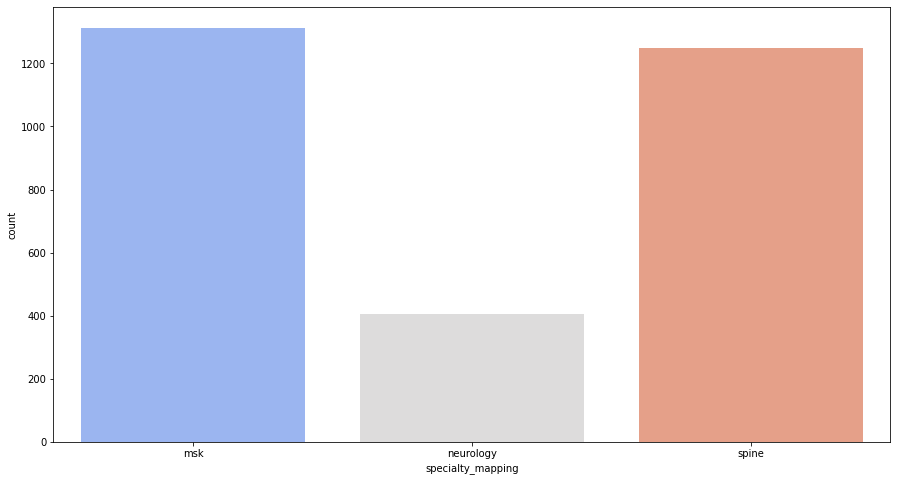

In [28]:
### plot 1 - BY SPECIALTY 
plt.figure(figsize=(15,8))
sns.countplot(x='specialty_mapping',data=data_merged_timecutt, palette="coolwarm",)

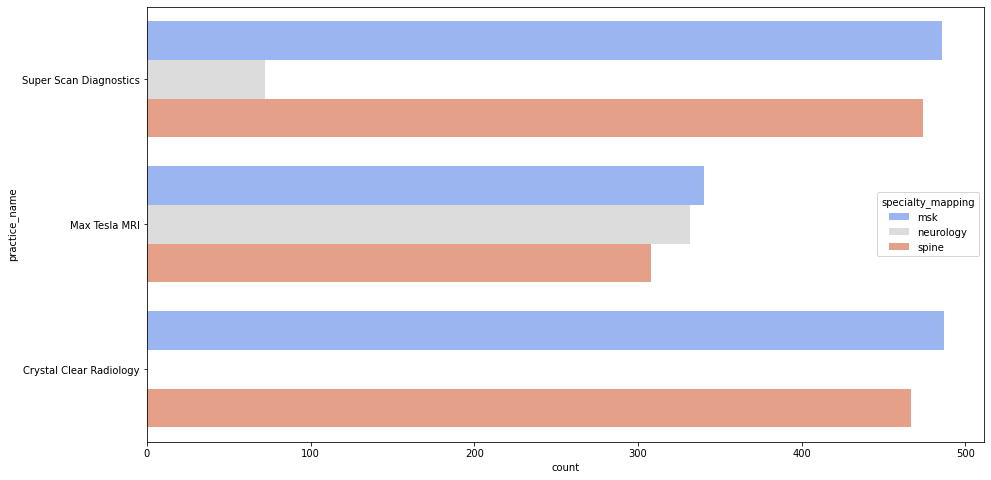

In [29]:
### plot 2 - BY SPECIALTY AND PRACTICE WITH TIME CUT OFF (e.g., 180 days)
plt.figure(figsize=(15,8))
sns.countplot(y="practice_name", hue="specialty_mapping", data=data_merged_timecutt, palette="coolwarm")

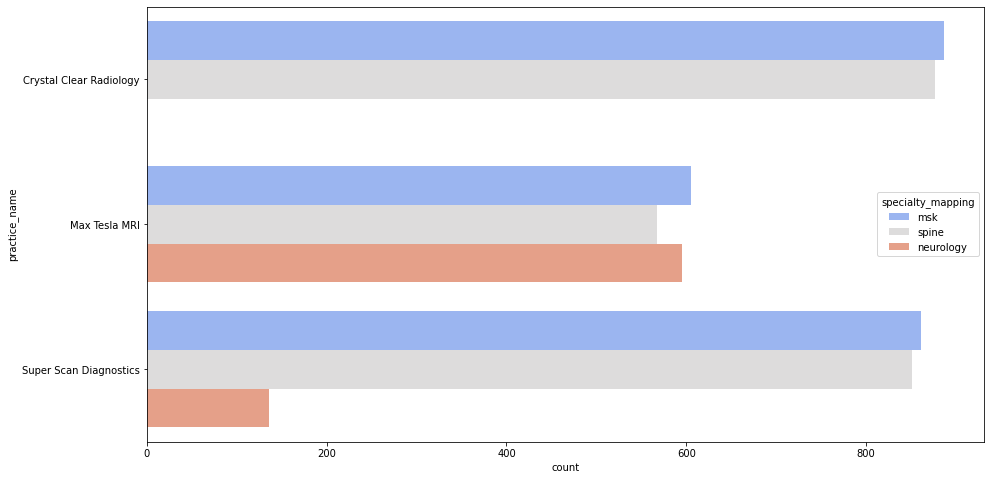

In [30]:
### plot 2.A - BY SPECIALTY AND PRACTICE WITH NO TIME CUT OFF (e.g., dont care about 180 more recent days)
plt.figure(figsize=(15,8))
sns.countplot(y="practice_name", hue="specialty_mapping", data=data_merged, palette="coolwarm")
#the below shows there is pretty little difference, between 180 day cut off and non-180 day cut off 

In [31]:
time = data_merged_timecutt
time = time[['practice_name','specialty_mapping', 'exam_dos', 'exam_cost', 'exam_yearmonth','exam_month','exam_quarter','exam_year','exam_season']]

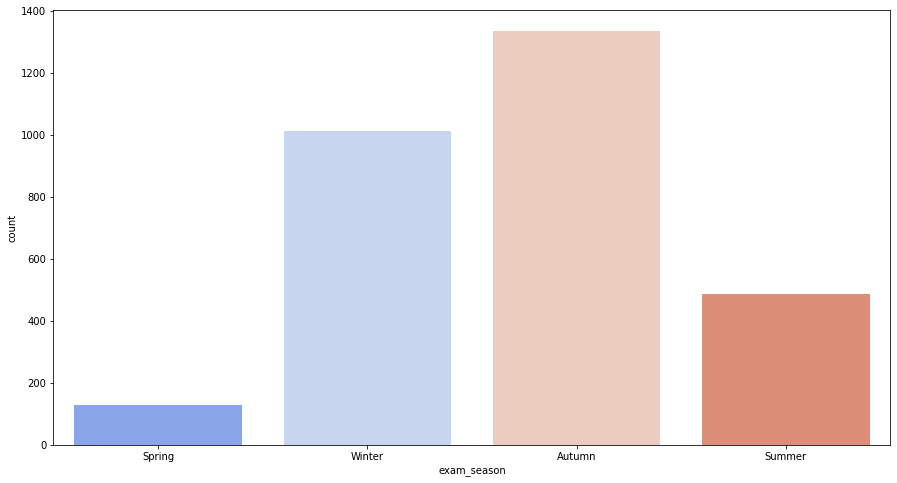

In [32]:
plt.figure(figsize=(15,8))
sns.countplot(x="exam_season", data=time, palette="coolwarm") #winder drop in utilization // 
## differences in utilization based on season - NOTE - this will be off since we are only looking at LAST 180 days, versus 365 days // 